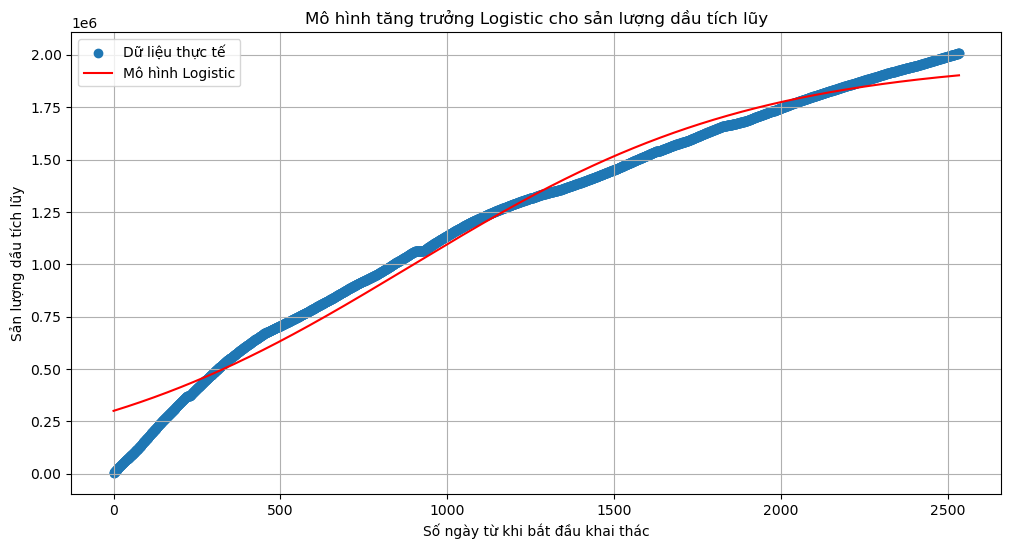

Q∞ (EUR): 1980912.43
Tham số a: 5.6065
Tham số b: 0.001938
R-squared: 0.9811
RMSE: 74309.28


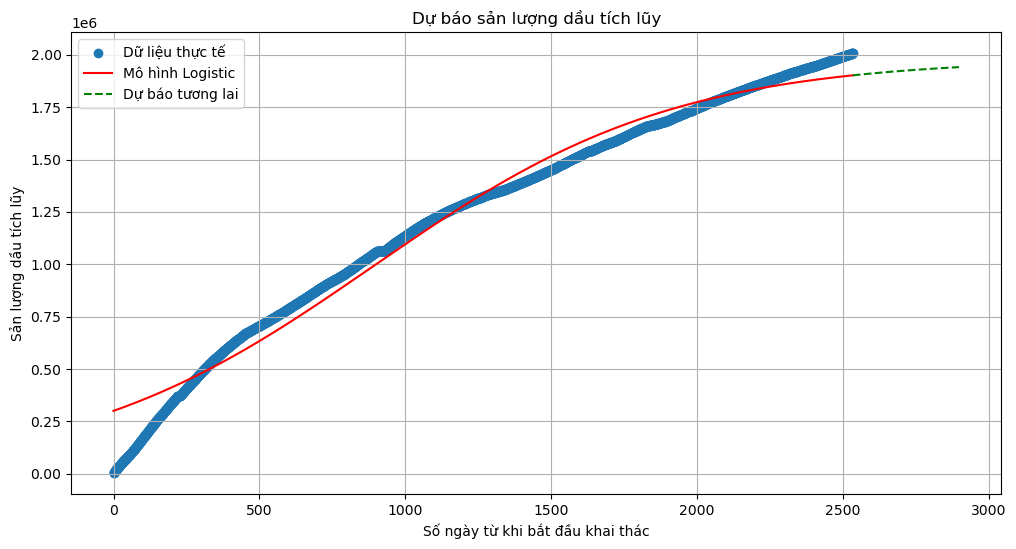

In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu từ file Excel
data = pd.read_excel('Book2.xlsx', sheet_name='Sheet1')

# Chuyển đổi ngày thành số ngày từ ngày đầu tiên
data['Date'] = pd.to_datetime(data['Date'])
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Lấy dữ liệu sản lượng tích lũy
time = data['Days'].values
cumulative_production = data['Oil_Cum'].values * 1e6  # Chuyển đổi đơn vị nếu cần

# Hàm mô hình Logistic
def logistic_model(t, Q_inf, a, b):
    return Q_inf / (1 + a * np.exp(-b * t))

# Ước lượng tham số ban đầu
Q_inf_guess = cumulative_production[-1] * 1.5  # Ước lượng Q∞ lớn hơn giá trị hiện tại
a_guess = 100
b_guess = 0.01

# Tìm các tham số tối ưu
params, covariance = curve_fit(logistic_model, time, cumulative_production, 
                              p0=[Q_inf_guess, a_guess, b_guess],
                              maxfev=10000)

Q_inf, a, b = params

# Dự báo
predicted = logistic_model(time, Q_inf, a, b)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.scatter(time, cumulative_production, label='Dữ liệu thực tế')
plt.plot(time, predicted, 'r-', label='Mô hình Logistic')
plt.xlabel('Số ngày từ khi bắt đầu khai thác')
plt.ylabel('Sản lượng dầu tích lũy')
plt.title('Mô hình tăng trưởng Logistic cho sản lượng dầu tích lũy')
plt.legend()
plt.grid(True)
plt.show()

# In các tham số
print(f"Q∞ (EUR): {Q_inf:.2f}")
print(f"Tham số a: {a:.4f}")
print(f"Tham số b: {b:.6f}")

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(cumulative_production, predicted)
rmse = np.sqrt(mean_squared_error(cumulative_production, predicted))

print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

future_days = np.arange(time[-1], time[-1] + 365)  # Dự báo 1 năm tới
future_production = logistic_model(future_days, Q_inf, a, b)

plt.figure(figsize=(12, 6))
plt.scatter(time, cumulative_production, label='Dữ liệu thực tế')
plt.plot(time, predicted, 'r-', label='Mô hình Logistic')
plt.plot(future_days, future_production, 'g--', label='Dự báo tương lai')
plt.xlabel('Số ngày từ khi bắt đầu khai thác')
plt.ylabel('Sản lượng dầu tích lũy')
plt.title('Dự báo sản lượng dầu tích lũy')
plt.legend()
plt.grid(True)
plt.show()